Loading of  Data and EDA

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

file_path = 'Program_Choice.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please provide the correct dataset.")

data = pd.read_csv(file_path)

print(data.head())
print("\n\nDescription of data\n\n")
print(data.describe())

   Unnamed: 0     id  female     ses  schtyp      prog  read  write  math  \
0           0   45.0  female     low  public  vocation  34.0   35.0  41.0   
1           1  108.0    male  middle  public  vocation  34.0   33.0  41.0   
2           2   15.0    male    high  public  vocation  39.0   39.0  44.0   
3           3   67.0    male     low  public  vocation  37.0   37.0  42.0   
4           4  153.0    male  middle  public  vocation  39.0   31.0  40.0   

   science  socst        honors  awards  cid  
0     29.0   26.0  not enrolled     0.0    1  
1     36.0   36.0  not enrolled     0.0    1  
2     26.0   42.0  not enrolled     0.0    1  
3     33.0   32.0  not enrolled     0.0    1  
4     39.0   51.0  not enrolled     0.0    1  


Description of data


       Unnamed: 0          id        read       write        math     science  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    99.500000  100.500000   52.230000   52.775000   52.645000   5

Check missing values

In [59]:

if data.isnull().sum().any():
    print("Warning: Missing values found in the dataset.")
else:
    print("No missing values detected.")


No missing values detected.


Distribution of programs

C:\Users\patel\AppData\Local\Temp\ipykernel_19720\131853949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='prog', palette='viridis')


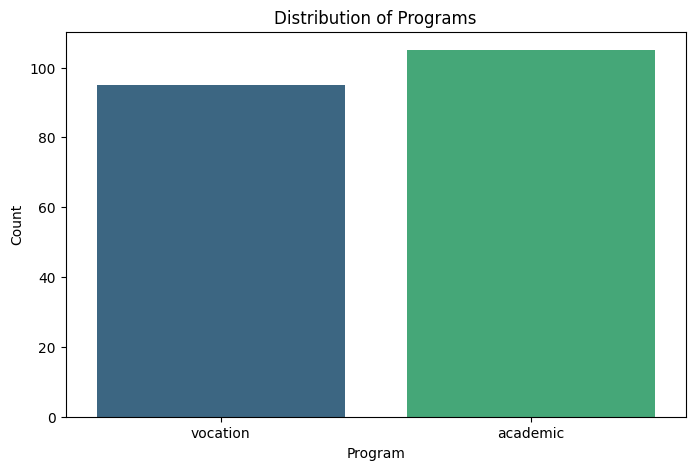

In [60]:
# Visualize the distribution of programs
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='prog', palette='viridis')
plt.title('Distribution of Programs')
plt.xlabel('Program')
plt.ylabel('Count')
plt.show()


Preprosessing pipeline

In [61]:
# Preprocessing pipeline
categorical_features = ['female', 'ses', 'schtyp', 'honors']
numeric_features = ['read', 'write', 'math', 'science', 'socst', 'awards']

# OneHotEncoding for categorical features, standard scaling for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Create pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200, random_state=42))
])


Data Splitting

In [62]:
# Features and target
X = data[categorical_features + numeric_features]
y = data['prog']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[15  4]
 [ 9 12]]

Classification Report:
              precision    recall  f1-score   support

    academic       0.62      0.79      0.70        19
    vocation       0.75      0.57      0.65        21

    accuracy                           0.68        40
   macro avg       0.69      0.68      0.67        40
weighted avg       0.69      0.68      0.67        40



Correlation heatmap for numeric features

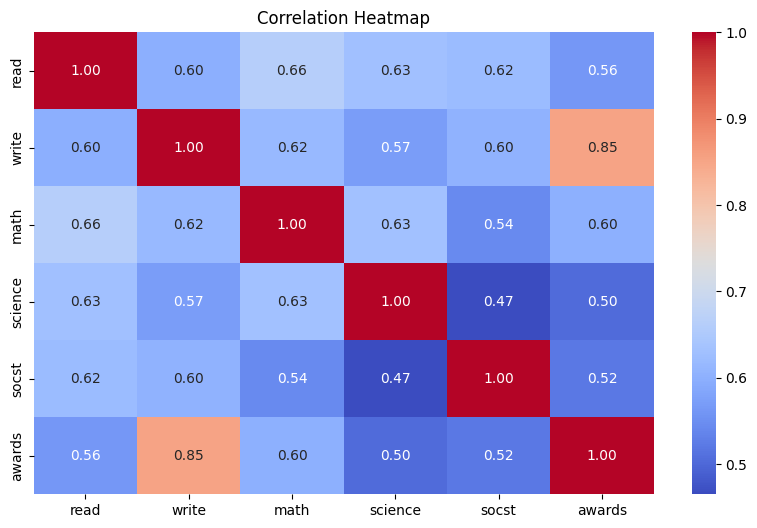

In [63]:


plt.figure(figsize=(10, 6))
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Prediction for a new student

In [64]:
def predict_program(student_data):
    """Predict the program for a new student."""
    student_df = pd.DataFrame([student_data])
    prediction = pipeline.predict(student_df)
    return prediction[0]

#sample student
new_student = {
    'female': 'female', 
    'ses': 'middle',    
    'schtyp': 'public',  
    'read': 35.0,
    'write': 34.0,
    'math': 40.0,
    'science': 30.0,
    'socst': 35.0,
    'honors': 'not enrolled', 
    'awards': 1
}

predicted_program = predict_program(new_student)
print(f"The predicted program for the new student is: {predicted_program}")

The predicted program for the new student is: vocation
